In [1]:
from collections import deque

In [2]:
import numpy as np
from mazelib import Maze
from mazelib.generate.Prims import Prims
import random
from matplotlib import pyplot as plt

In [3]:
MAZE_SIZE = 20
NUM_TELEPORTS = 2

In [4]:
def generate_maze_with_teleports(n=MAZE_SIZE, t=NUM_TELEPORTS):
    maze = Maze()
    maze.generator = Prims(int(MAZE_SIZE / 2), int(MAZE_SIZE / 2))
    maze.generate()
    maze.generate_entrances(True, True)
    teleports = []
    available_cells = []
    for i in range(len(maze.grid)):
        for j in range(len(maze.grid[0])):
            if maze.grid[i, j] == 0:
                available_cells.append((i, j))

    random.shuffle(available_cells)
    for i in range(NUM_TELEPORTS):
        start, destination = available_cells.pop(), available_cells.pop()
        teleports.append((start, destination))

    return maze, teleports

In [5]:
def bfs(maze, teleports):
    up = (-1, 0)
    down = (1, 0)
    left = (0, -1)
    right = (0, 1)

    rows, cols = len(maze.grid), len(maze.grid[0])
    start, end = maze.start, maze.end
    queue = deque([(start, 0)])
    visited = {start}
    came_from = {}
    steps_map = {start: 0}

    teleport_map = {source: destination for source, destination in teleports}
    teleport_map.update({destination: source for source, destination in teleports})

    while queue:
        (x, y), steps = queue.popleft()

        if (x, y) == end:
            path = []
            current = (x, y)
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()

            return steps, path, steps_map

        for dx, dy in [up, down, left, right]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited:
                if maze.grid[nx][ny] == 0 or (nx, ny) == end:
                    visited.add((nx, ny))
                    came_from[(nx, ny)] = (x, y)
                    steps_map[(nx, ny)] = steps + 1
                    queue.append(((nx, ny), steps + 1))

        if (x, y) in teleport_map:
            tp_x, tp_y = teleport_map[(x, y)]
            if (tp_x, tp_y) not in visited:
                visited.add((tp_x, tp_y))
                came_from[(tp_x, tp_y)] = (x, y)
                steps_map[(tp_x, tp_y)] = steps + 1
                queue.append(((tp_x, tp_y), steps + 1))

    return -1, [], {}

In [6]:
def task_1():
    maze, teleports = generate_maze_with_teleports()

    print("Generated Maze:")
    print(maze)
    print(f"Start: {maze.start}, End: {maze.end}")
    print(f"Teleport links: {teleports}")

    steps, path, steps_map = bfs(maze, teleports);

    print(f"Steps to reach the goal: {steps}" if steps != -1 else "No path to goal found.")

    fig, ax = plt.subplots()
    grid = np.array(maze.grid, dtype=float)
    for x, y in path:
        if (x, y) not in steps_map:
            print(f"Key {(x, y)} is missing in steps_map!")

    for x, y in path:
        grid[x, y] = 0.5
        ax.text(y, x, str(steps_map[(x, y)]), ha='center', va='center', color='black', fontsize=8)
    start_x, start_y = maze.start
    end_x, end_y = maze.end
    grid[start_x, start_y] = 0.2  # Color for the start position
    grid[end_x, end_y] = 0.8  # Color for the end position
    for (x1, y1), (x2, y2) in teleports:
        grid[x1, y1] = 0.3
        grid[x2, y2] = 0.3
    ax.imshow(grid, cmap='viridis', interpolation='none')
    ax.axis('off')
    plt.title(f"Steps to Goal: {steps}")
    plt.show()

In [7]:
def task_2():
    results = []
    sizes = [10, 15, 20, 25, 30]

    for size in sizes:
        maze, teleports = generate_maze_with_teleports(size, 2)
        steps, path, steps_map  = bfs(maze, teleports)
        results.append((size, steps))
        print(f"Size: {size}x{size}, Steps to Goal: {steps}")

    maze_sizes = [size for size, steps in results]
    steps_to_goal = [steps for size, steps in results]

    plt.plot(maze_sizes, steps_to_goal, marker='o', linestyle='-')
    plt.xlabel("Maze Size (n x n)")
    plt.ylabel("Steps to Goal")
    plt.title("Effect of Maze Size on Steps to Goal")
    plt.grid()
    plt.show()

In [8]:
def task_3():
    results = []
    teleport_counts = list(range(0, 11))

    for t_count in teleport_counts:
        maze, teleports = generate_maze_with_teleports(30, t_count)
        steps, path, steps_map  = bfs(maze, teleports)
        results.append((t_count, steps))
        print(f"Teleports: {t_count}, Steps to Goal: {steps}")

    teleports = [t_count for t_count, steps in results]
    steps_to_goal = [steps for t_count, steps in results]

    plt.plot(teleports, steps_to_goal, marker='o', linestyle='-')
    plt.xlabel("Number of Teleportation Links")
    plt.ylabel("Steps to Goal")
    plt.title("Effect of Teleportation Links on Steps to Goal")
    plt.grid()
    plt.show()

Generated Maze:
#####E###############
#   #   # #     #   #
# ##### # # ##### # #
# #   #   #     # # #
# ### ### # ##### ###
#     #       #   # #
##### ##### ### ### #
#         #     #   #
# ### ##### # ##### #
#   #     # #     # #
### # # ##### ##### #
# # # #             #
# ### ### # # ### ###
#     #   # #   #   #
# # # ### ### ### # #
# # # #     #   # # #
# ### ### # # ### ###
#   # #   # #   #   #
### ### ##### ### # #
#     # #       # # #
###########S#########
Start: (20, 11), End: (0, 5)
Teleport links: [((18, 13), (5, 1)), ((5, 10), (14, 19))]
Steps to reach the goal: 30


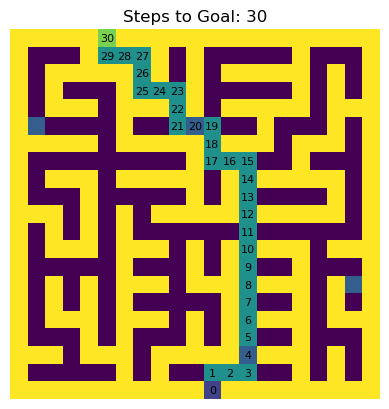

In [10]:
task_1();

Size: 10x10, Steps to Goal: 28
Size: 15x15, Steps to Goal: 22
Size: 20x20, Steps to Goal: 46
Size: 25x25, Steps to Goal: 23
Size: 30x30, Steps to Goal: 38


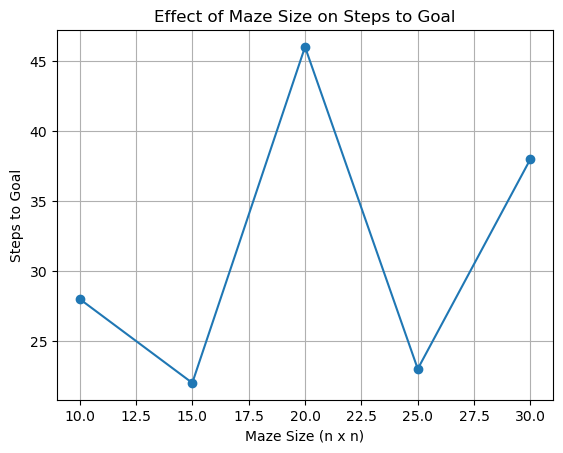

In [11]:
task_2();

Teleports: 0, Steps to Goal: 34
Teleports: 1, Steps to Goal: 36
Teleports: 2, Steps to Goal: 42
Teleports: 3, Steps to Goal: 28
Teleports: 4, Steps to Goal: 36
Teleports: 5, Steps to Goal: 42
Teleports: 6, Steps to Goal: 40
Teleports: 7, Steps to Goal: 15
Teleports: 8, Steps to Goal: 32
Teleports: 9, Steps to Goal: 22
Teleports: 10, Steps to Goal: 36


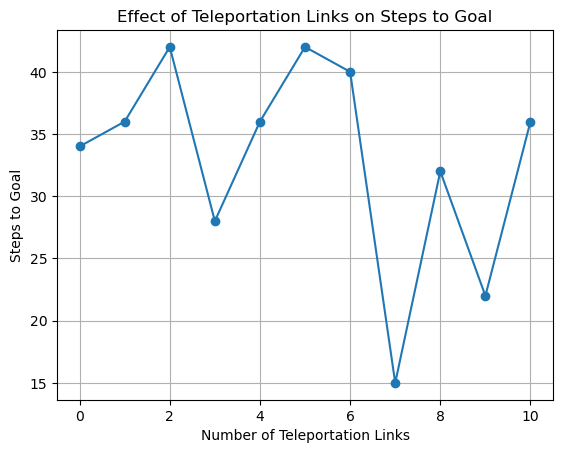

In [12]:
task_3();